## Unsupervised Learning ##

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.

The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. The clusters are modeled using a measure of similarity which is defined upon metrics such as Euclidean or probabilistic distance.

## k-Means clustering ##

One of the most common clustering analysis algorithm is k-means, which partitions data into k distinct clusters based on distance to the centroid of a cluster.

The algorithm for k-means is as under. Input to the algorithm is "k", a.k.a number of clusters desired:
1. Select k random points as centroids. These points need not be from samples.
2. Assign each sample to the closest centroid
3. Take a mean value of all samples in a cluster and compute new centroids

The above is repeated until convergence (centroids do not vary much)

Let's dive into an example.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Let's generate some data blobs synthetically

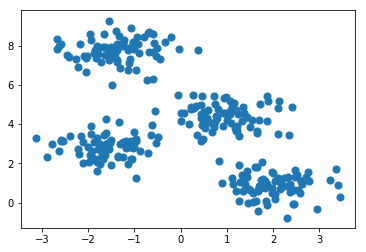

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Now let's use k-means clustering on this data and visualize the clusters

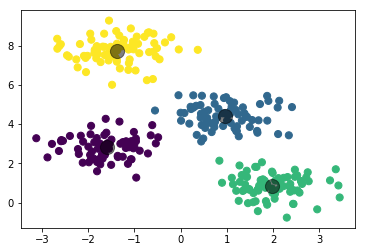

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


Let's apply the same to wine quality dataset

[K-means 2]Error: 1.98, Score: -152.368706477, AMI: 0.519360805606, ARI: 0.539921829421


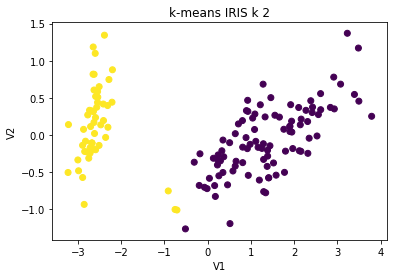

[K-means 3]Error: 0.106666666667, Score: -78.9408414261, AMI: 0.748372393323, ARI: 0.730238272283


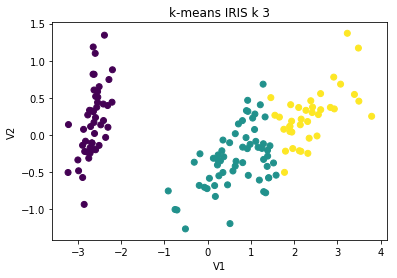

[K-means 4]Error: 1.66666666667, Score: -57.3178732143, AMI: 0.646895662262, ARI: 0.649817685382


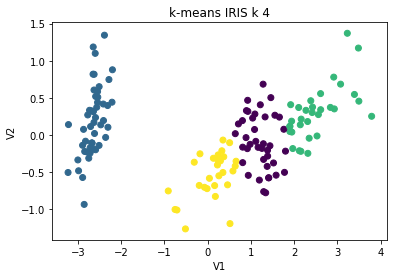

[K-means 5]Error: 3.22, Score: -46.5355820513, AMI: 0.591789148166, ARI: 0.607896465236


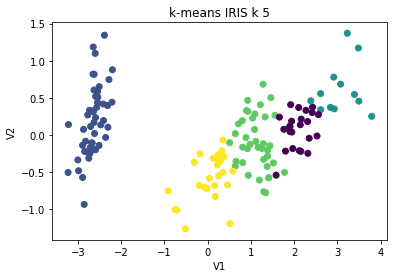

[K-means 6]Error: 6.96666666667, Score: -38.9494348445, AMI: 0.510958921773, ARI: 0.44813027093


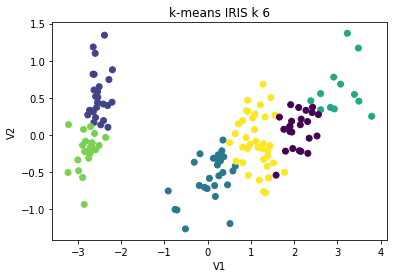

[K-means 7]Error: 7.81333333333, Score: -34.1967910994, AMI: 0.51922423246, ARI: 0.479159919992


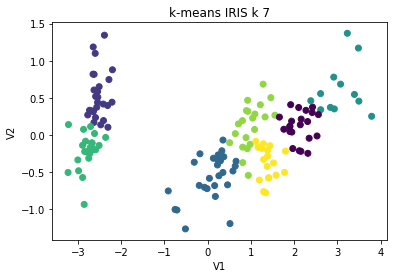

[K-means 8]Error: 7.46666666667, Score: -30.1453784794, AMI: 0.493666517142, ARI: 0.450136946807


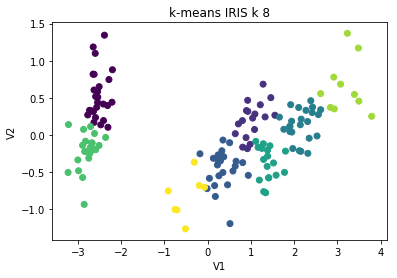

[K-means 9]Error: 14.3466666667, Score: -27.9850740093, AMI: 0.469342429164, ARI: 0.415771374938


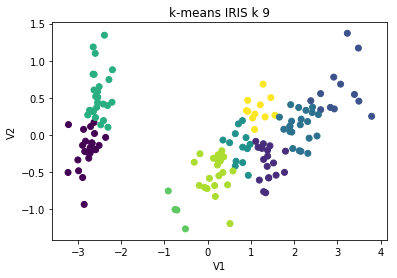

[K-means 10]Error: 21.0666666667, Score: -25.8287965368, AMI: 0.444659039522, ARI: 0.374390415647


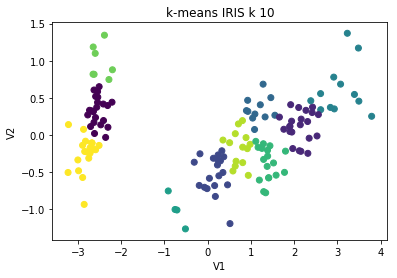

[K-means 11]Error: 23.4666666667, Score: -24.4865043078, AMI: 0.421721266205, ARI: 0.333984676044


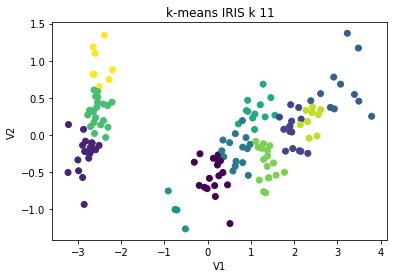

[K-means 12]Error: 23.9266666667, Score: -22.9648008658, AMI: 0.415701554292, ARI: 0.336993603235


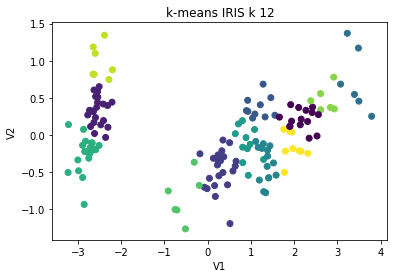

[K-means 13]Error: 39.8933333333, Score: -21.9120533274, AMI: 0.375772195665, ARI: 0.294090015367


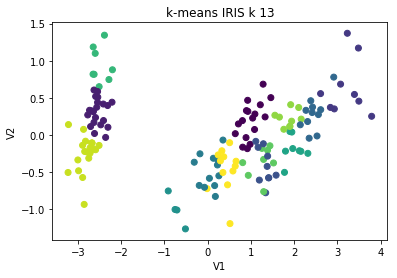

[K-means 14]Error: 45.3333333333, Score: -20.639488345, AMI: 0.381968714242, ARI: 0.291339231788


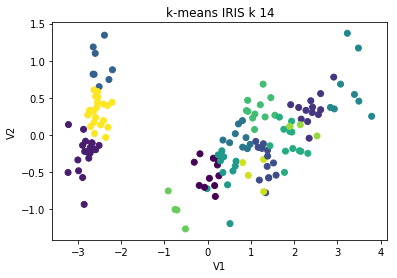

[K-means 15]Error: 49.9266666667, Score: -18.9720553613, AMI: 0.371192943486, ARI: 0.280032821095


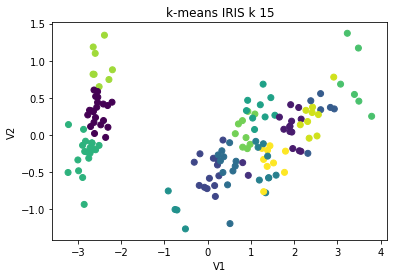

[K-means 16]Error: 57.84, Score: -17.6979572233, AMI: 0.357745649836, ARI: 0.242972748557


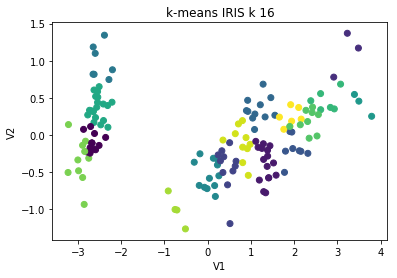

[K-means 17]Error: 75.0866666667, Score: -17.3392297702, AMI: 0.341146464294, ARI: 0.234096692112


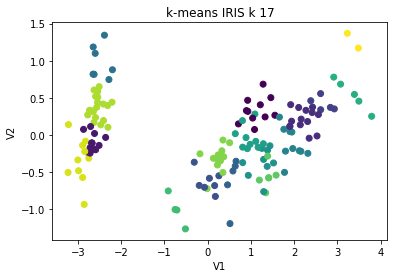

[K-means 18]Error: 67.8533333333, Score: -16.275211039, AMI: 0.338879764401, ARI: 0.239206932683


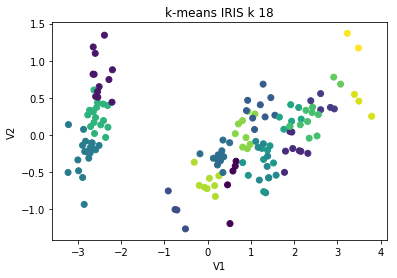

[K-means 19]Error: 75.9666666667, Score: -15.3941724109, AMI: 0.3243545417, ARI: 0.209483799713


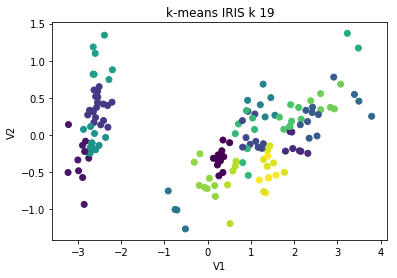

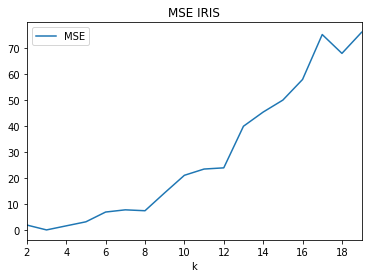

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
from sklearn.metrics import accuracy_score, mean_squared_error, \
    adjusted_mutual_info_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn import datasets

def plot_mse_data(df, x, title):
    df.plot(x=x, y="MSE", title=title)

def plot_cluster(X, labels, title):
    pca = PCA(2)
    cols = pca.fit_transform(X)
    plt.scatter(x=cols[:, 0], y=cols[:, 1], c=labels)
    plt.xlabel("V1")
    plt.ylabel("V2")
    plt.title(title)
    plt.show()
    
def kmeans(num_clusters, X, y, df, dataset):
    clf = KMeans(num_clusters, random_state=123456)
    labels = clf.fit_predict(X)
    mse = mean_squared_error(y, labels)
    score = clf.score(X)
    ami = adjusted_mutual_info_score(y, labels)
    ari = adjusted_rand_score(y, labels)
    df.loc[num_clusters-1] = [num_clusters, mse]
    print "[K-means {}]Error: {}, Score: {}, AMI: {}, ARI: {}".format(
        num_clusters, mse, score, ami, ari)
    plot_cluster(X, labels, "k-means {} k {}".format(dataset, num_clusters))
    
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_mse = pd.DataFrame(columns=["k", "MSE"])

for k in range(2, 20):
    kmeans(k, iris.data, iris.target, df_mse, "IRIS")

plot_mse_data(df_mse, "k", "MSE IRIS")

Based on the error score, optimal clusters appear to be 9




## Principal Component Analysis for Dimensionality Reduction ##

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is one of the most widely used feature extraction algorithms to:
1. Simplify data for exploration and visualization
2. Highlight features that are most relevant

For instance, let's consider the wine dataset.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.DataFrame(iris.data).describe()


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using PCA, let's find out how many features are really relevant.

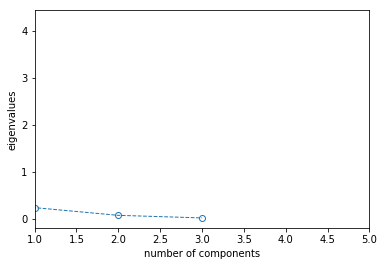

In [9]:
pca = PCA(random_state=123456)
pca.fit(iris.data)

plt.figure()
plt.plot(pca.explained_variance_, 'o--', linewidth=1, fillstyle='none')
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.xlim([1, iris.data.shape[1]+1])
plt.show()

As seen above, PCA has transformed the dataset into principal components in the order of relevance.

## Select k-best ##

Select k-best is another algorithm for dimensionality reduction based on univariate feature selection, which works by selecting the best features based on univariate statistical tests. These statistical tests could be one of mutual information, chi square, ANOVA-F, etc.

In order to select the most relevant features, the below experiment uses a baseline accuracy of classification prediction computed from a SVM classifier using all the features of the dataset. Then select-k-best algorithm is used to transform the dataset into features ranging from minimum 2 until max, and the accuracy of classification of transformed dataset using the same SVM model is compared against baseline.

This testing methodology is called "wrapping", where a learner is wrapped along with the DR algorithm to determine the best features.

In [2]:
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectKBest, f_classif, \
mutual_info_classif, chi2, SelectPercentile, SelectFpr, SelectFdr, SelectFwe,\
    GenericUnivariateSelect
from sklearn.model_selection import train_test_split


def run_kbest(X, y, xtest, ytest, algo):
    accuracies = []
    components = range(1, X.shape[1]+1)
    for dim in components:
        skbest = SelectKBest(algo, k=dim)
        X_transformed = skbest.fit_transform(X, y)

        model = SVC()
        model.fit(X_transformed, y)

        test = skbest.transform(xtest)
        accuracies.append(accuracy_score(model.predict(test), ytest))
    return accuracies


def perform_kbest(X, y, xtest, ytest, dataset):
    accuracies = pd.DataFrame(columns=range(1, 11))
    components = range(1, X.shape[1]+1)
    model = SVC()
    model.fit(X, y)
    baseline = accuracy_score(model.predict(xtest), ytest)
    for i, algo in enumerate([f_classif, mutual_info_classif, chi2]):
        acc = run_kbest(X, y, xtest, ytest, algo)
        accuracies[i] = np.asarray(acc)

    acc = np.asarray(accuracies.mean(axis=1))
    plt.figure()
    plt.suptitle("Accuracy of SelectKBest on {}".format(dataset))
    plt.xlabel("number of components")
    plt.ylabel("Accuracy")
    plt.xlim([1, X.shape[1]])
    plt.ylim([0, 1.0])
    plt.plot(components, [baseline] * len(acc), color='r')
    plt.plot(components, acc)
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.7, 
                                                    random_state=123456, stratify=iris.target)
perform_kbest(X_train, y_train, X_test, y_test, "IRIS")
skbest = SelectKBest(chi2, k=3)
X_transform = skbest.fit_transform(X_train, y_train)

skbest = SelectKBest(chi2, k=3)
X_transform = skbest.fit_transform(X_test, y_test)

NameError: name 'iris' is not defined

Per the above plot, we are hitting baseline prediction performance with just 1 feature !!